In [1]:
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
% matplotlib inline

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters

In [2]:
def posterior_grid_approx(grid_points, success, tosses):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [6]:
np.random.seed(100)
p_grid, posterior  = posterior_grid_approx(grid_points=100, success=8, tosses=15)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

In [7]:
# 90% HDPI using samples (10k)
#narrowest interval that contains 90% of the data
pm.hpd(samples, alpha=0.5)

array([0.41414141, 0.57575758])

In [8]:
# Posterior check
ppc = stats.binom.pmf(8,15,samples)

# Hard

In [9]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 
                   0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,
                   0,0,0,0,0, 1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,
                   1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

In [94]:
birth=sum(birth1)+sum(birth2)
p_grid = np.linspace(0, 1, len(birth1)+len(birth2))
prior = np.repeat(2, len(birth2)+len(birth1))  # uniform

likelihood = stats.bernoulli.pmf(0.41, p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior / unstd_posterior.sum()

ValueError: max must be larger than min in range parameter.

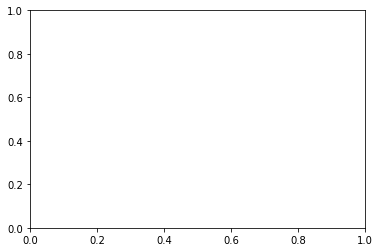

In [56]:
plt.hist(posterior)